In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [98]:
import pandas as pd

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models.phrases import Phrases, Phraser

import multiprocessing
from gensim.models import Word2Vec
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import spacy  # For preprocessing
import logging 

In [99]:
df = pd.read_csv('/content/Preprocessed data.csv', encoding= 'latin1')


In [100]:
import re
df['text_modified']=df['text_modified'].apply(str)
def remove_hash(text):
    line=re.sub(r'#\w+','',text)
    return line
def remove_punct(text):
    line = re.sub(r'[]!"$%&\'?()*+,./:;=#@[\\^_`{|}~-]+', '', text)
    return line
df['text_modified']=df['text_modified'].apply(lambda x:remove_hash(x))
df['text_modified']=df['text_modified'].apply(lambda x:remove_punct(x))

In [101]:
sent = [row.split() for row in df['text_modified']]

In [102]:
phrases = Phrases(sent, min_count=30, progress_per=10000)


In [103]:
bigram = Phraser(phrases)
sentences = bigram[sent]

In [104]:
w2v_model = Word2Vec(min_count=20,
                     window=4,
                     size=300,
                     sample=1e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [105]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.01 mins


In [106]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.18 mins


In [107]:
w2v_model.init_sims(replace=True)

In [108]:
w2v_model.wv.most_similar(positive=["Paine"])


[('made', 0.9999335408210754),
 ('England', 0.9999326467514038),
 ('getting', 0.9999314546585083),
 ('heart', 0.9999306201934814),
 ('beat', 0.9999302625656128),
 ('For', 0.999929666519165),
 ('hit', 0.9999286532402039),
 ('history', 0.9999279975891113),
 ('mean', 0.9999275803565979),
 ('bowled', 0.9999271631240845)]

In [109]:
w2v_model.wv.most_similar(positive=["Pant"])


[('shown', 0.9999291896820068),
 ('According', 0.9999285936355591),
 ('drop', 0.9999280571937561),
 ('least', 0.9999278783798218),
 ('every', 0.9999275803565979),
 ('AM', 0.9999273419380188),
 ('showed', 0.9999269247055054),
 ('hope', 0.9999268054962158),
 ('tough', 0.9999266862869263),
 ('Siraj', 0.9999266862869263)]

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [93]:
vectorizer = TfidfVectorizer( max_features = 1000)
desc = df['lemmatized'].values
X3 = vectorizer.fit_transform(desc)

words = vectorizer.get_feature_names()

**ELBOW METHOD TO CHECK NO. OF CLUSTERS**


As a rule of thumb, the optimal number of clusters are chosen according to 'elbow criteria' in the graph.


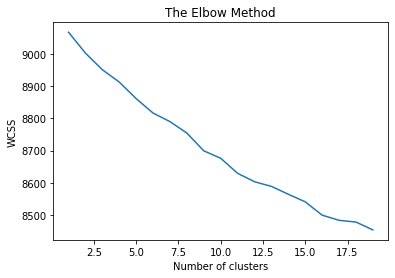

In [97]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()



*   As observed in the graph there is a minor elbow around 8 number of clusters. 
*   Hence K-Means clustering method is not suitable to seperate our data into 3 sentiment categories.

**Potential reasons for K-Means failing ?**

*   Small dataset.
*   Each cluster should have equal size of observations.






